# Amazon Cellphone Reviews and Price Comparisons



```items.csv``` contains retrieved (read: scraped) items from Amazon.com search results using generated URL and specific query string to search only specific brands and has minimal 1 star review.

```reviews.csv``` contains reviews for previously retrieved items at items.csv but not with columns from items.csv.

In [33]:
import pandas as pd   
import matplotlib.pyplot as plt
import numpy
from matplotlib import pyplot

In [83]:
# making data frame   
df_global = pd.read_csv("20190928-items.csv")
df = df_global
df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [50]:
#Drop specific colums
new_obj = df.drop(['url', 'image', 'reviewUrl'], axis=1)

In [51]:
#groupby brand name and return the average of each brand
df = new_obj.groupby('brand', as_index=False).rating.mean().round(2)

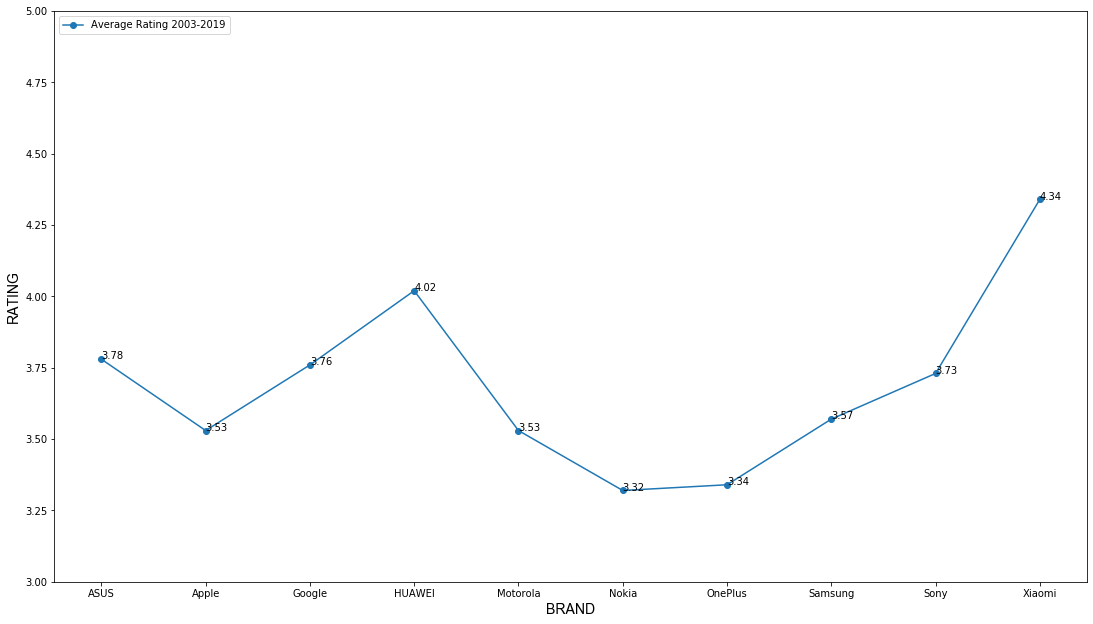

In [52]:
#Plot df using pyplot
fig = pyplot.figure()
ax = fig.add_subplot()
fig.set_size_inches(18.5, 10.5)
ax.set_ylim(3,5)
ax.set_xlabel("BRAND", fontname="Arial", fontsize=14)
ax.set_ylabel("RATING", fontname="Arial", fontsize=14)
pyplot.plot(df['brand'],df['rating'], label= 'Average Rating 2003-2019', marker='o')
plt.legend(loc="upper left")
for i,j in zip(df['brand'],df['rating']):
    ax.annotate(str(j),xy=(i,j))

pyplot.show()

In [54]:
#Drop rows with value NaN
new_obj = new_obj.dropna(subset =['prices'], axis=0)

In [55]:
#return the minimue price for of the phone if range is given
new_obj["prices"]= new_obj["prices"].str.split('\,\$', n=1, expand=True)

In [56]:
new_obj

,asin,brand,title,rating,totalReviews,prices
1,B0009N5L7K,Motorola,Motorola I265 phone,2.9,7,$49.95
6,B001DZY4KI,Sony,Sony Ericsson G700 Triband GSM Phone Bronze (U...,2.0,1,$78.99
8,B0027VKQPE,Nokia,Nokia New 1100 for Tracfone,3.2,8,$99.99
9,B00280QJFU,Samsung,Samsung T301G Prepaid Phone (Tracfone),3.5,133,$59.89
10,B0029X7UHC,Motorola,Motorola I205 cell phone nextel/Boost,2.9,2,$99.95
...,...,...,...,...,...,...
787,B07WFJ6HRF,Apple,"Apple iPhone XS, 512GB, Gold - For Verizon (Re...",3.7,50,$999.95
788,B07WKSVF6X,Samsung,"Samsung Galaxy A50 128GB, 4GB RAM 6.4"" Display...",4.7,7,$304.99
789,B07WVRJQ7V,Samsung,"Samsung Galaxy S9 (64GB, 4GB RAM) 5.8"" QHD+ Di...",2.0,1,$519.99
790,B07WXKWDT2,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",3.0,5,$139.99


In [57]:
#Remove the dollar sign and convert the value to floar
new_obj["prices"]= new_obj["prices"].str.replace('\$', '')
new_obj["prices"]= new_obj["prices"].str.replace('\,', '').astype(float)

In [58]:
new_obj

,asin,brand,title,rating,totalReviews,prices
1,B0009N5L7K,Motorola,Motorola I265 phone,2.9,7,49.95
6,B001DZY4KI,Sony,Sony Ericsson G700 Triband GSM Phone Bronze (U...,2.0,1,78.99
8,B0027VKQPE,Nokia,Nokia New 1100 for Tracfone,3.2,8,99.99
9,B00280QJFU,Samsung,Samsung T301G Prepaid Phone (Tracfone),3.5,133,59.89
10,B0029X7UHC,Motorola,Motorola I205 cell phone nextel/Boost,2.9,2,99.95
...,...,...,...,...,...,...
787,B07WFJ6HRF,Apple,"Apple iPhone XS, 512GB, Gold - For Verizon (Re...",3.7,50,999.95
788,B07WKSVF6X,Samsung,"Samsung Galaxy A50 128GB, 4GB RAM 6.4"" Display...",4.7,7,304.99
789,B07WVRJQ7V,Samsung,"Samsung Galaxy S9 (64GB, 4GB RAM) 5.8"" QHD+ Di...",2.0,1,519.99
790,B07WXKWDT2,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",3.0,5,139.99


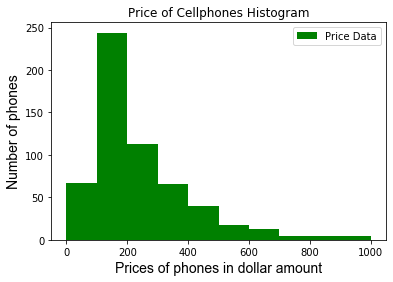

In [59]:
#plot the price colmn
plt.hist(new_obj['prices'], range=(0, 1000),
         align='mid', color='g', label='Price Data')
# you call legend so it shows the label as legend
plt.legend()
plt.xlabel("Prices of phones in dollar amount", fontname="Arial", fontsize=14)
plt.ylabel("Number of phones", fontname="Arial", fontsize=14)
plt.title('Price of Cellphones Histogram')
plt.show()

In [60]:
#Retive reviews data from the csv
df_Reviews = pd.read_csv("20190928-reviews.csv")   
    
df_Reviews.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes,Brand
0,B0000SX2UC,Janet,3,11-Oct-05,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia
1,B0000SX2UC,Luke Wyatt,1,7-Jan-04,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia
2,B0000SX2UC,Brooke,5,30-Dec-03,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia
3,B0000SX2UC,amy m. teague,3,18-Mar-04,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia
4,B0000SX2UC,tristazbimmer,4,28-Aug-05,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia
5,B0000SX2UC,J. White,4,25-Sep-05,False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,Nokia
6,B0000SX2UC,the cell phone store owner,5,16-Apr-04,False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,Nokia
7,B0000SX2UC,Matt,4,3-Apr-04,False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,Nokia
8,B0000SX2UC,Charles Cook,5,24-Nov-03,False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,Nokia
9,B0000SX2UC,Amazon Customer,3,2-Feb-04,False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,Nokia


In [61]:
#Convert date to datetime, set it as index and sort
df_Reviews['date'] = pd.to_datetime(df_Reviews['date'])
df_Reviews = df_Reviews.set_index(df_Reviews['date'])
df_Reviews = df_Reviews.sort_index()

In [62]:
df_Reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,Brand
date,,,,,,,,,
2003-11-24,B0000SX2UC,Charles Cook,5,2003-11-24,False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,Nokia
2003-12-30,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia
2004-01-07,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia
2004-02-02,B0000SX2UC,Amazon Customer,3,2004-02-02,False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,Nokia
2004-03-18,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia


In [63]:
#add year colum
df_Reviews['year'] = pd.DatetimeIndex(df_Reviews['date']).year

In [64]:
#filter by brand name
df = df_Reviews.loc[(df_Reviews['Brand'] == 'Motorola') | (df_Reviews['Brand'] == 'Samsung') | (df_Reviews['Brand'] == 'Apple') | (df_Reviews['Brand'] == 'Google') | (df_Reviews['Brand'] == 'Xiaomi')]

In [65]:
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,Brand,year
date,,,,,,,,,,
2005-07-21,B0009N5L7K,L. Hughes,1,2005-07-21,False,WARNING,My problems with nextel did not stop when I ca...,NaN,Motorola,2005
2006-02-07,B0009N5L7K,K. Mcilhargey,5,2006-02-07,False,I love it,"I just got it and have to say its easy to use,...",NaN,Motorola,2006
2006-02-09,B0009N5L7K,William B.,4,2006-02-09,False,Exellent Service,I have been with nextel for nearly a year now ...,NaN,Motorola,2006
2007-08-23,B000SKTZ0S,Mario C,4,2007-08-23,False,Solid phone,"Well, my phone that came with my service plan ...",NaN,Motorola,2007
2007-09-25,B000SKTZ0S,SlashMaster1,5,2007-09-25,False,More than great,"This phone is great. Simple to use, great batt...",NaN,Motorola,2007


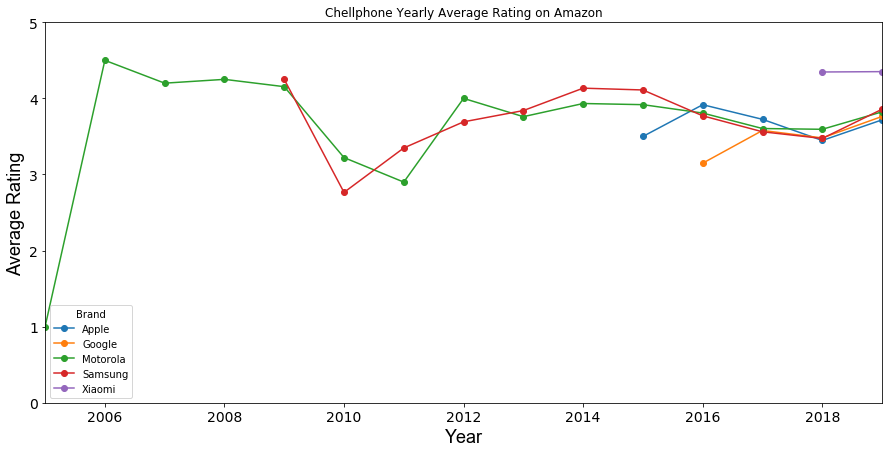

In [66]:
# plot average rating by year

df_avg = df.groupby(['year','Brand'], as_index=True).rating.mean().unstack()
df_avg.plot(title= 'Chellphone Yearly Average Rating on Amazon', label='Brands', marker='o', fontsize=14,figsize=(15,7))
plt.xlabel("Year", fontname="Arial", fontsize=18)
plt.ylabel("Average Rating", fontname="Arial", fontsize=18)
plt.ylim(0,5)
plt.show()

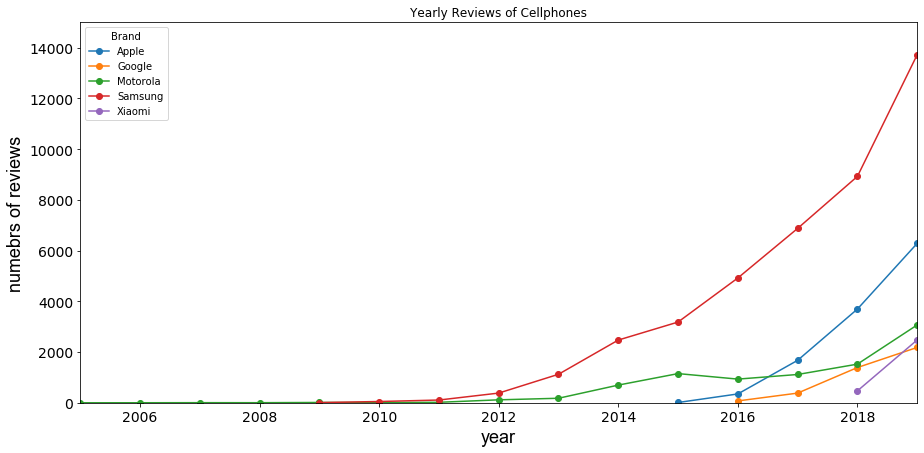

In [67]:
# plot reviews count by year

df_count = df.groupby(['year','Brand'], as_index=True).rating.count().unstack()
df_count.plot(title= 'Yearly Reviews of Cellphones', rot='horizontal', fontsize=14, marker='o', figsize=(15,7))
plt.xlabel("year", fontname="Arial", fontsize=18)
plt.ylabel("numebrs of reviews", fontname="Arial", fontsize=18)
plt.ylim(0, 15000)
plt.show()

In [89]:
#drop the unnecessary columns
df = df_global
new_obj = df.drop(['url','asin', 'image', 'reviewUrl'], axis=1)

In [90]:
#groub by brand and return the average of totalReviews and raging
new_obj = new_obj.groupby('brand').agg({'totalReviews':'count','rating':'mean'})
new_obj

,totalReviews,rating
brand,,
ASUS,13,3.776923
Apple,101,3.527723
Google,33,3.763636
HUAWEI,36,4.019444
Motorola,100,3.528000
Nokia,49,3.322449
OnePlus,7,3.342857
Samsung,397,3.573300
Sony,29,3.731034


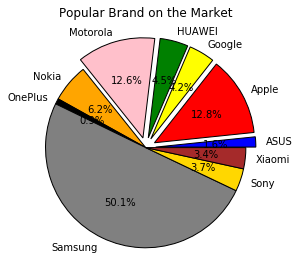

In [95]:
#plotting the data
slices  = new_obj['totalReviews']
labels  = new_obj.index
colors  = [ 'blue', 'red', 'yellow', 'green', 'pink', 'orange','black','gray','gold','brown','white']
explode = [0.1,0.1,0.1,0.1,0.1,0,0,0,0,0]
plt.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%',colors = colors, wedgeprops={'edgecolor':'black'})
plt.title("Popular Brand on the Market")
plt.tight_layout()
plt.show()

In [88]:
#Drops url, asin, image, and reviewURL columns 
new_obj2 = df.drop(['url','asin', 'image', 'reviewUrl'], axis=1)
new_obj2.head()

,brand,title,rating,totalReviews,prices
0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,NaN
1,Motorola,Motorola I265 phone,2.9,7,$49.95
2,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.6,22,NaN
3,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,2.4,5,NaN
4,Motorola,Motorola i335 Cell Phone Boost Mobile,3.3,21,NaN


In [79]:
#Drop rows with value NaN
new_obj2 = new_obj2.dropna(subset =['prices'], axis=0)

#splits elements in prices column that contain $
new_obj2["prices"]= new_obj2["prices"].str.split('\,\$', n=1, expand=True)

#Removes dollar signs and converts the values to float type
new_obj2["prices"]= new_obj2["prices"].str.replace('\$', '')
new_obj2["prices"]= new_obj2["prices"].str.replace('\,', '').astype(float)
new_obj2.head()

,brand,title,rating,totalReviews,prices
1,Motorola,Motorola I265 phone,2.9,7,49.95
6,Sony,Sony Ericsson G700 Triband GSM Phone Bronze (U...,2.0,1,78.99
8,Nokia,Nokia New 1100 for Tracfone,3.2,8,99.99
9,Samsung,Samsung T301G Prepaid Phone (Tracfone),3.5,133,59.89
10,Motorola,Motorola I205 cell phone nextel/Boost,2.9,2,99.95


In [80]:
#show data grouped by brand and aggregated by average price and average rating
new_obj2 = new_obj2.groupby('brand').agg({'prices':'mean','rating':'mean'})
new_obj2

,prices,rating
brand,,
ASUS,255.801818,3.818182
Apple,262.204787,3.525532
Google,332.243077,3.780769
HUAWEI,263.071034,4.000000
Motorola,164.286667,3.569565
Nokia,145.328387,3.348387
OnePlus,480.332000,3.100000
Samsung,268.963485,3.620076
Sony,331.853810,3.719048


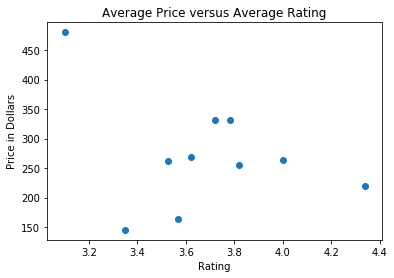

In [81]:
#create scatterplot using rating and prices
plt.scatter(new_obj2.rating, new_obj2.prices)
plt.title('Average Price versus Average Rating')
plt.xlabel('Rating')
plt.ylabel('Price in Dollars')
plt.show()